## Worksheet 4
### Beginning to understand linear models

#### PART 0: loading any packages that you think you will need

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns

We will once again work with the Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

For more information, see https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


1. Load the data from sklearn.datasets, as done before.

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df['label'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


2. We will compare two classifiers: k-nearest neighbors, and the Perceptron. To this end:

    a) Create a random split of the data for training and validation.
    
    b) Fit both models to the training data (suggested parameters: k = 3 for kNN, and `penalty='l2'`, `alpha=1e-6`, `tol=1e-10` for perceptron).
    
    c) evaluate their accuracy on the held-out validation set.

To have a sense of uncertainty, repeat steps a-c 50 times, and plot the resulting distributions of accuracies accross these realizations (e.g., you can use boxplots).

Which classifier seems better?

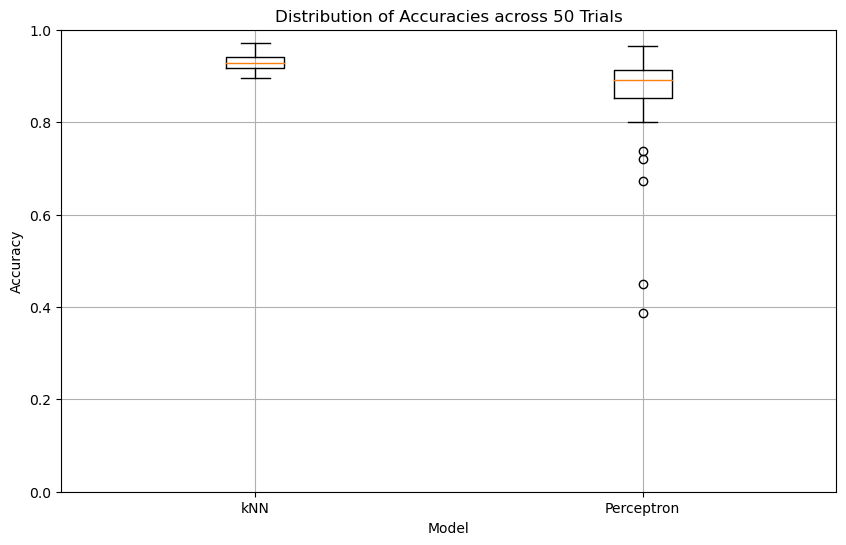

In [3]:
X = cancer.data
y = cancer.target
knn_accuracies = []
perceptron_accuracies = []
for x in range(50):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(xtrain, ytrain)
    knn_accuracies.append(knn.score(xtest, ytest))
    perceptron = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    perceptron.fit(xtrain, ytrain)
    perceptron_accuracies.append(perceptron.score(xtest, ytest))

plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, perceptron_accuracies], labels=['kNN', 'Perceptron'])
plt.title('Distribution of Accuracies across 50 Trials')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
# From boxplots, it seems that kNN is better classifier as it has higher average accuracy and less deviation between
# different trials. 

3. Did you look at the distribution of the data? Have a look at the marginal distributions of each feature, as well as the correlation between them, with the function `pairplot`, from the package `seaborn` (and read its description). Select only a few (say, 4-6 features) for this. Are the features in similar scales?

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


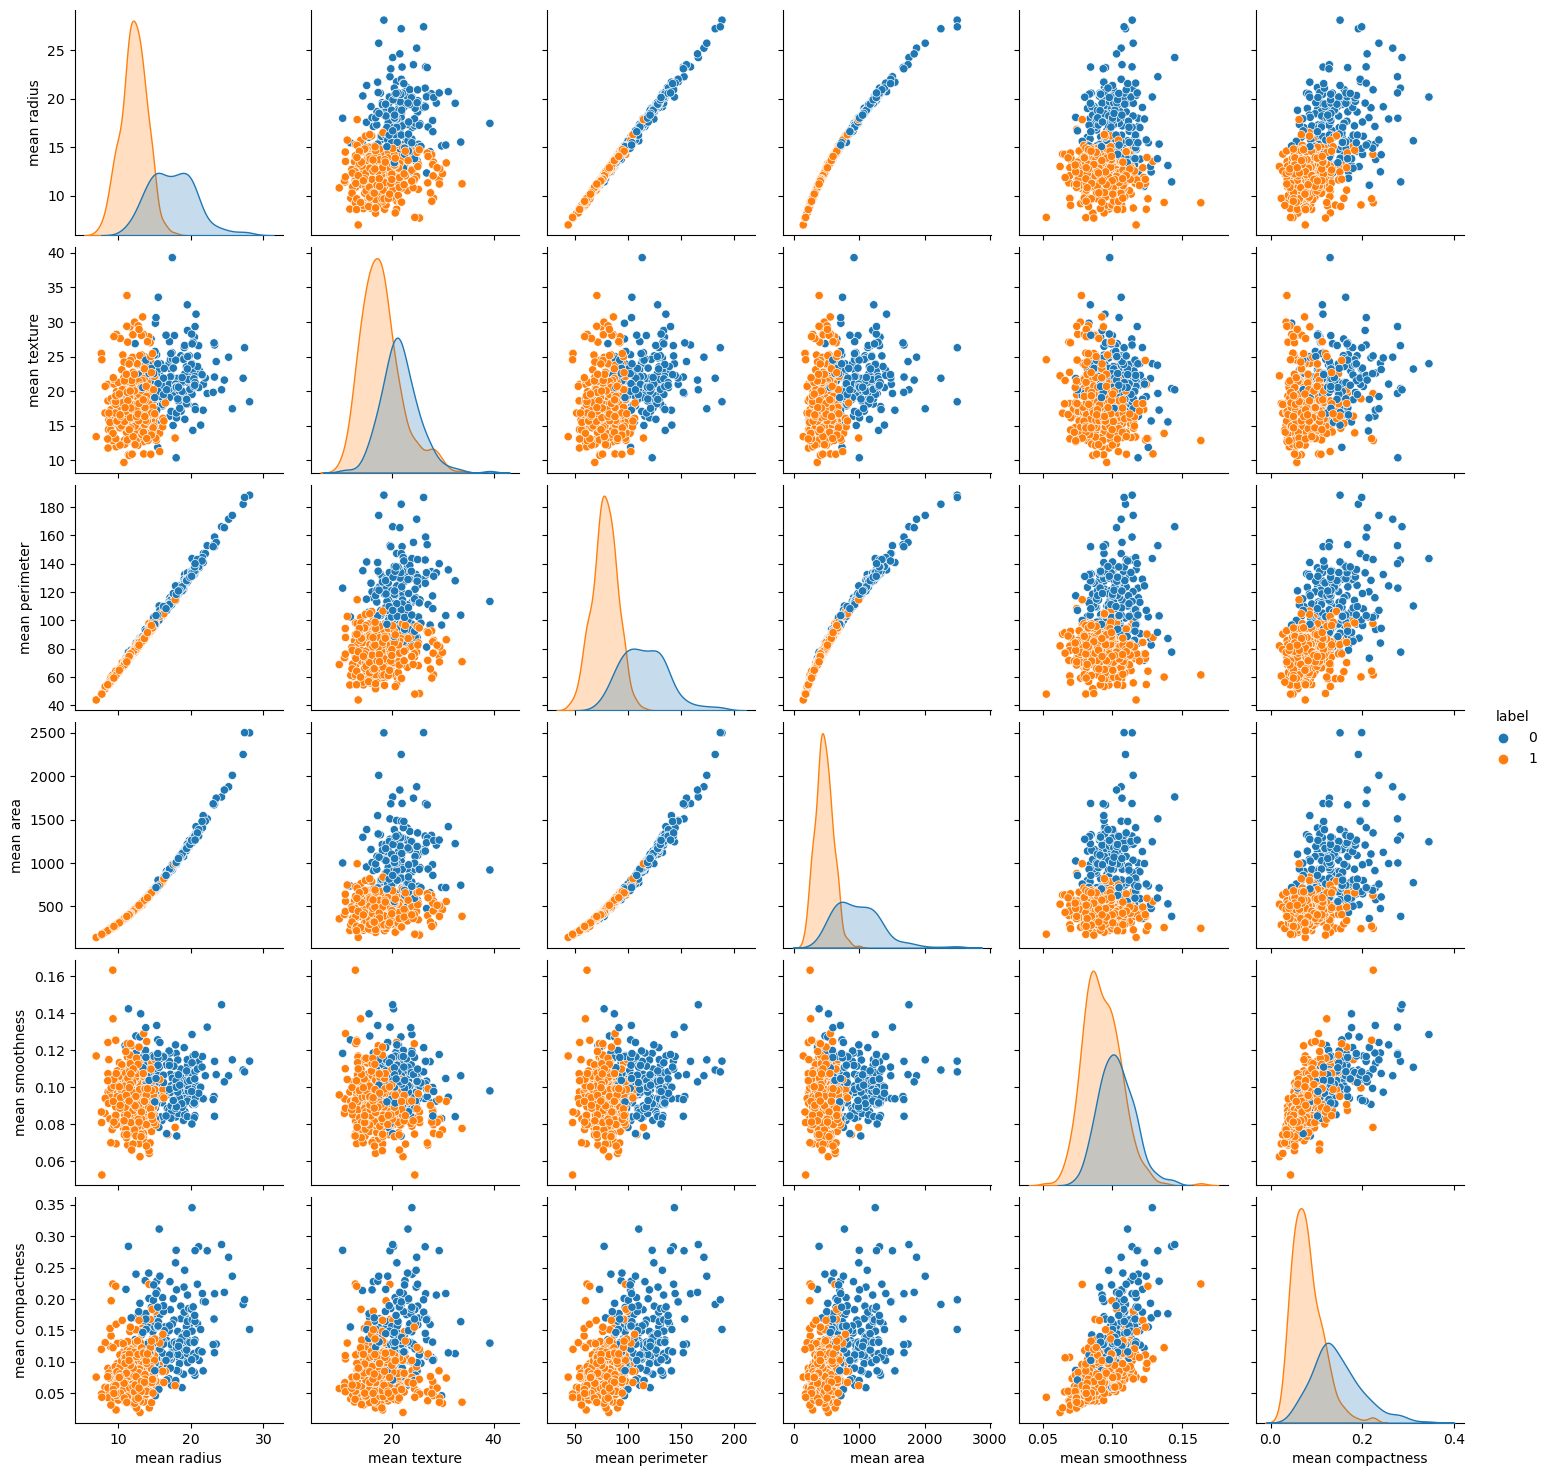

In [4]:
features = df.columns[:6]
sns.pairplot(df, vars = df[features], hue = 'label')
plt.show()
# No the scales between pairs of features vary by a lot, both on the x and y axes. 

4. Very different ranges for the values of features is problematic for many learning algorithms. Repeat the question # 2 but now normalize the data beforehand. You can use the function `normalize` from `sklearn.preprocessing` (and read its description!). Which classifier is better now? Compute the statistics of the data as you did in question #3, but now for the normalized data. What has changed?

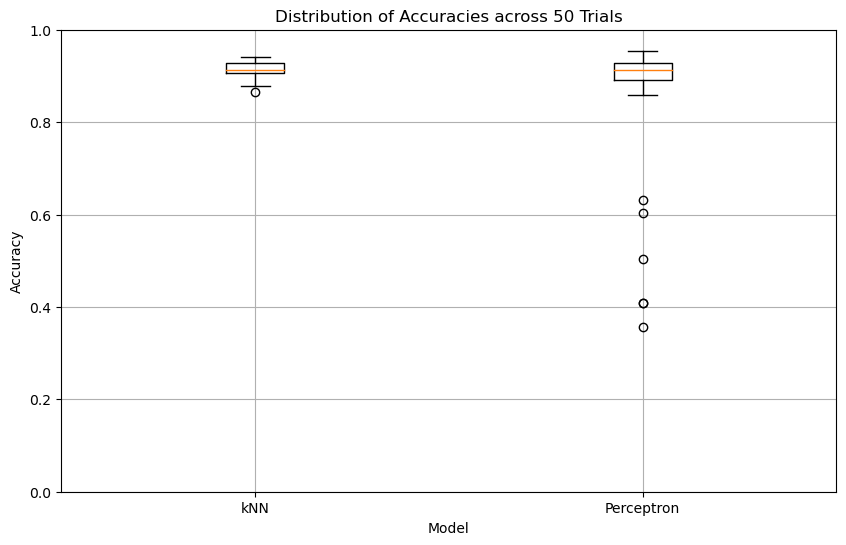

In [5]:
X = normalize(cancer.data)
y = cancer.target
knn_accuracies = []
perceptron_accuracies = []
for x in range(50):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(xtrain, ytrain)
    knn_accuracies.append(knn.score(xtest, ytest))
    perceptron = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    perceptron.fit(xtrain, ytrain)
    perceptron_accuracies.append(perceptron.score(xtest, ytest))

plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, perceptron_accuracies], labels=['kNN', 'Perceptron'])
plt.title('Distribution of Accuracies across 50 Trials')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
# now the classifier average accuracy is much closer between knn and perceptron, however I would still say that
# knn is better since it has zero outliers while it appears perceptron has roughly 4 outliers. 

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


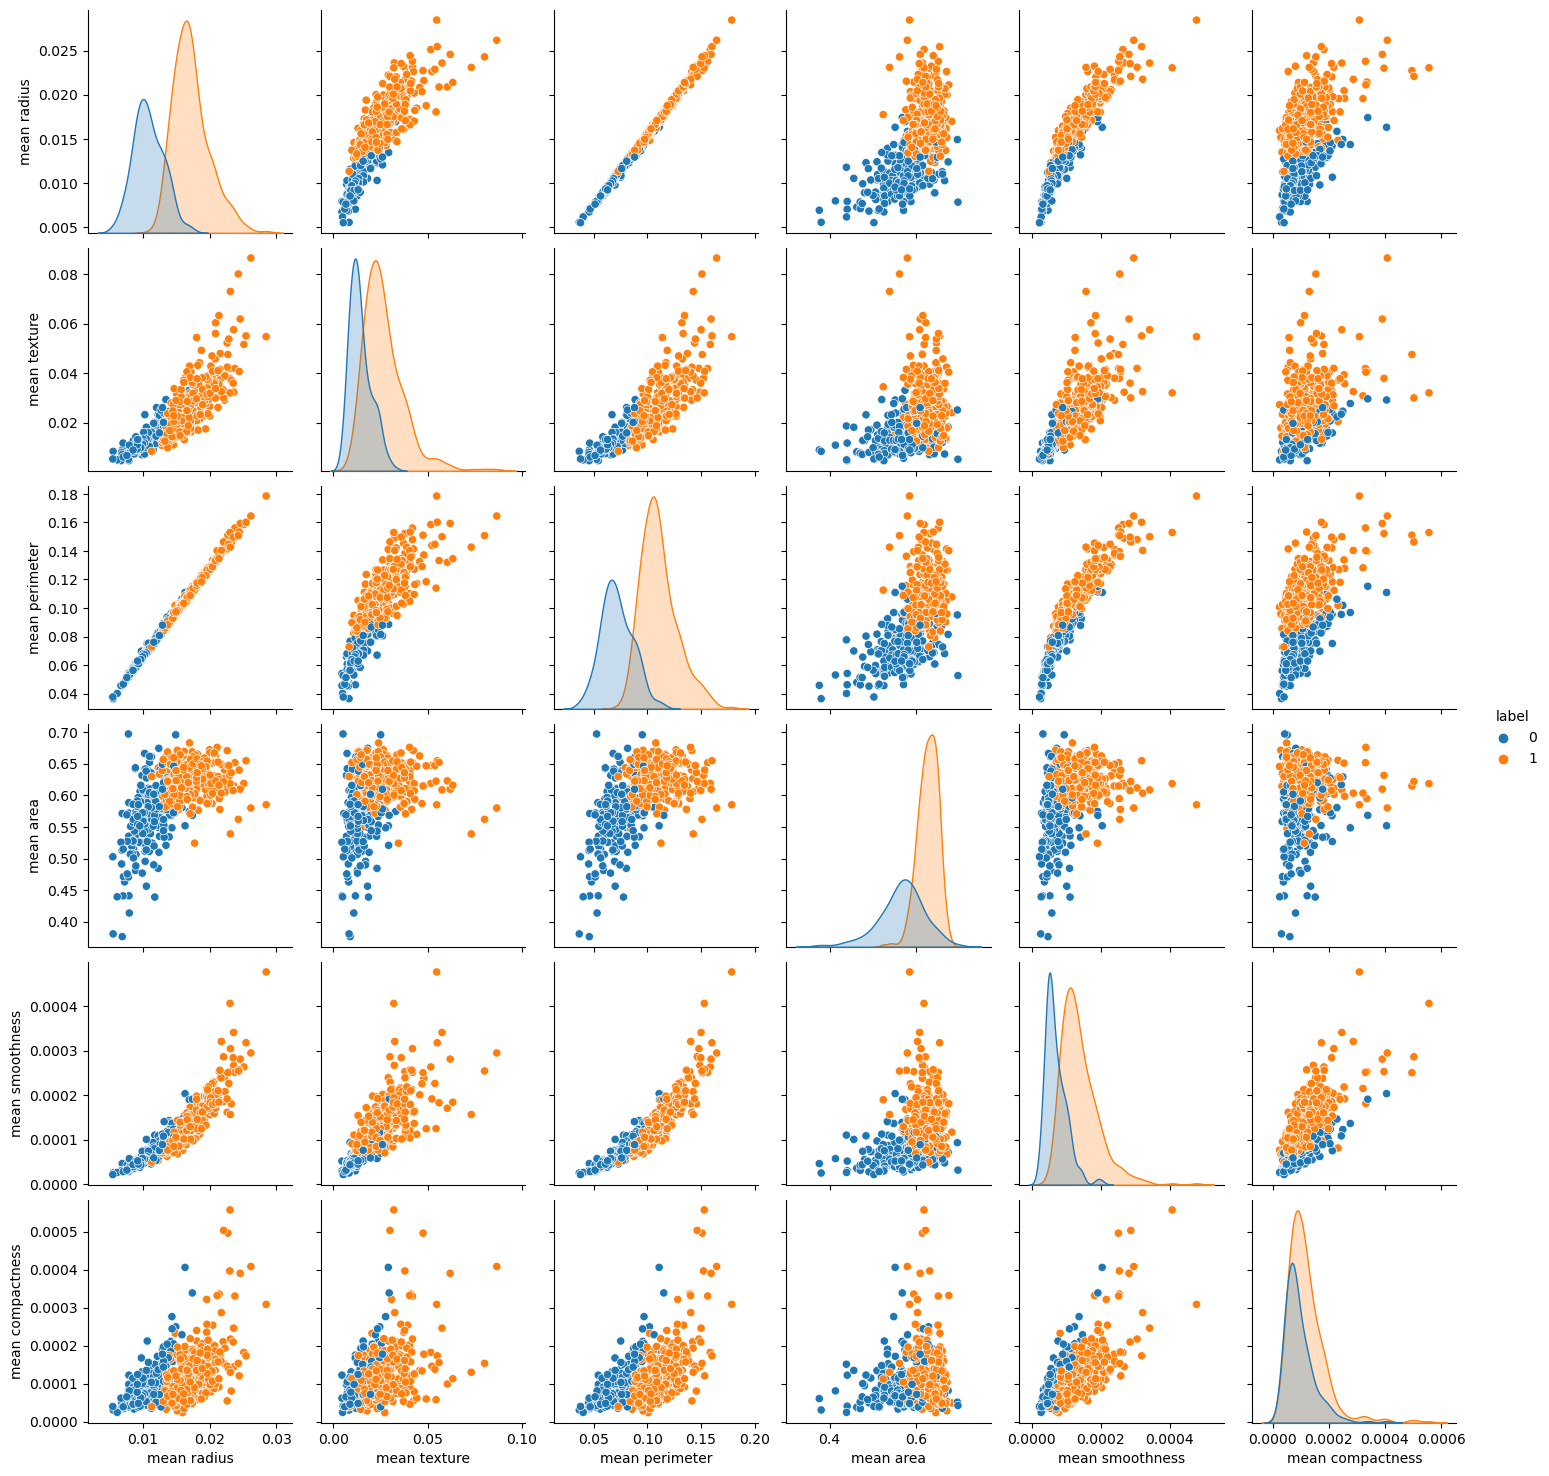

In [6]:
df_normal = pd.DataFrame(data = normalize(cancer.data), columns = cancer.feature_names)
df_normal['label'] = cancer.target
features = df_normal.columns[:6]
sns.pairplot(df_normal, vars = df_normal[features], hue = 'label')
plt.show()
# after normalizing, the scales for the pairings are much closer

5. **BONUS**: machine learning algorithms can be sensitive to corruptions on data. Repeat Question #2 (normalizing the data!) but at test time, simulate the contamination of data by adding some amount of Gaussian noise to the features. Evaluate how the accuracy deteriorates for both algorihms as you increase the amount of contamination

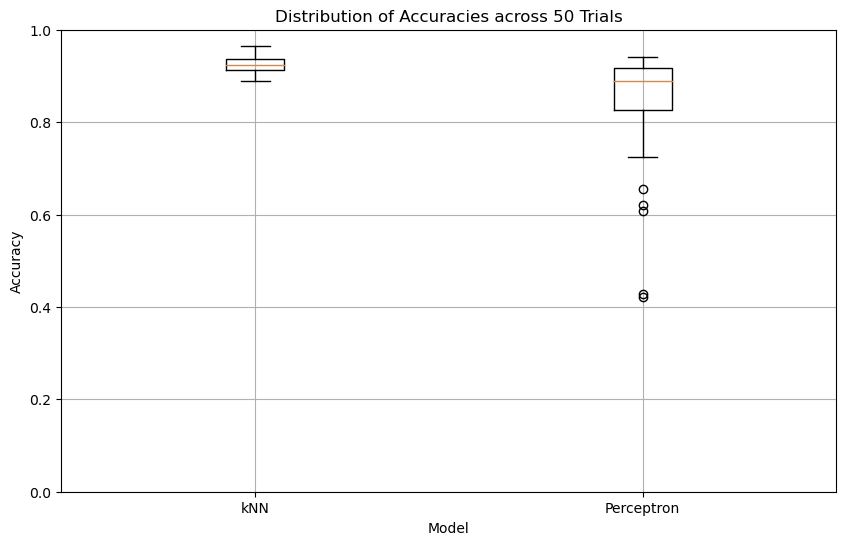

In [11]:
X = cancer.data
y = cancer.target
knn_accuracies = []
perceptron_accuracies = []
for x in range(50):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    noise = 0.1
    xtest = xtest + np.random.normal(loc=0, scale=noise, size=xtest.shape)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(xtrain, ytrain)
    knn_accuracies.append(knn.score(xtest, ytest))
    perceptron = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    perceptron.fit(xtrain, ytrain)
    perceptron_accuracies.append(perceptron.score(xtest, ytest))

plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, perceptron_accuracies], labels=['kNN', 'Perceptron'])
plt.title('Distribution of Accuracies across 50 Trials')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
# trying noise levels of 0.1,0.5,1,3, I see that the spread and accuracy of kNN doesn't change much with noise,
# but the spread of perceptron increases with increased noise, and the accuracy tended to go down as well. 